(sentinel-2)=
# Sentinel-2 L2A

## Product description

The Sentinel-2 L2A data product available in the SALDi Data Cube (SDC) is a 
mirror of [Digital Earth Africa](https://www.digitalearthafrica.org/)'s product 
of the same name. 

Detailed information can be found [here](https://registry.opendata.aws/deafrica-sentinel-2/).

The product abbreviation used in this package is `s2_l2a`

## Loading data

In [1]:
from matplotlib import pyplot as plt
import numpy as np

from sdc.load import load_product

ds = load_product(product="s2_l2a", 
                  vec="site06", 
                  time_range=("2021-01-01", "2022-01-01"),
                  s2_apply_mask=True)  # True by default
ds

<xarray.Dataset>
Dimensions:      (time: 438, latitude: 5500, longitude: 6500)
Coordinates:
  * latitude     (latitude) float64 -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 30.75 30.75 30.75 ... 32.05 32.05 32.05
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2021-01-01T08:17:00 ... 2021-12-29T08:...
Data variables:
    B02          (time, latitude, longitude) float32 dask.array<chunksize=(438, 254, 300), meta=np.ndarray>
    B03          (time, latitude, longitude) float32 dask.array<chunksize=(438, 254, 300), meta=np.ndarray>
    B04          (time, latitude, longitude) float32 dask.array<chunksize=(438, 254, 300), meta=np.ndarray>
    B05          (time, latitude, longitude) float32 dask.array<chunksize=(438, 254, 300), meta=np.ndarray>
    B06          (time, latitude, longitude) float32 dask.array<chunksize=(438, 254, 300), meta=np.ndarray>
    B07          (time, latitude, longitude) float32 dask.array<chunksize=(438, 254, 300), meta=np.ndarray>
    B08          (time, latitude, longitude) float32 dask.array<chunksize=(438, 254, 300), meta=np.ndarray>
    B8A          (time, latitude, longitude) float32 dask.array<chunksize=(438, 254, 300), meta=np.ndarray>
    B09          (time, latitude, longitude) float32 dask.array<chunksize=(438, 254, 300), meta=np.ndarray>
    B11          (time, latitude, longitude) float32 dask.array<chunksize=(438, 254, 300), meta=np.ndarray>
    B12          (time, latitude, longitude) float32 dask.array<chunksize=(438, 254, 300), meta=np.ndarray>

Exactly as the example in the {ref}`sentinel-1` notebook, we have now _lazily_ loaded 
Sentinel-2 L2A data. If you are not familiar with the concept of lazy loading, please
refer to {ref}`xarray-dask-intro` and the {ref}`sentinel-1` notebook. The latter also 
covers some Xarray basics (Look for the "Xarray Shorts" sections), so be sure to check 
it out if you haven't already.

Let's have a closer look at the `B08`-band (Near Infrared):

In [2]:
ds.B08

<xarray.DataArray 'B08' (time: 438, latitude: 5500, longitude: 6500)>
dask.array<rechunk-merge, shape=(438, 5500, 6500), dtype=float32, chunksize=(438, 254, 300), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 30.75 30.75 30.75 ... 32.05 32.05 32.05
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2021-01-01T08:17:00 ... 2021-12-29T08:...

(xarray-shorts-3)=
## Xarray Shorts: Spatial subset

In {ref}`xarray-shorts-1` we have indexed our data by time and also selected a point 
coordinate. Using the `.sel`-method we can also select a spatial subset by slicing the
`latitude` and `longitude` dimensions. This is also described [here](https://docs.xarray.dev/en/stable/user-guide/indexing.html#nearest-neighbor-lookups).

In [3]:
ds_subset = ds.sel(longitude=slice(31.4, 31.8), 
                   latitude=slice(-25.8, -25.4))
ds_subset.B08

<xarray.DataArray 'B08' (time: 438, latitude: 0, longitude: 2000)>
dask.array<getitem, shape=(438, 0, 2000), dtype=float32, chunksize=(438, 0, 300), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 
  * longitude    (longitude) float64 31.4 31.4 31.4 31.4 ... 31.8 31.8 31.8 31.8
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2021-01-01T08:17:00 ... 2021-12-29T08:...

Wait, why does it say the size array size is 0 Bytes and doesn't show a data structure?

Maybe Xarray wants the coordinates in a different order? 

Let's try again...

In [4]:
ds_subset = ds.sel(longitude=slice(31.4, 31.8), 
                   latitude=slice(-25.4, -25.8))
ds_subset.B08

<xarray.DataArray 'B08' (time: 438, latitude: 2000, longitude: 2000)>
dask.array<getitem, shape=(438, 2000, 2000), dtype=float32, chunksize=(438, 254, 300), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 -25.4 -25.4 -25.4 ... -25.8 -25.8 -25.8
  * longitude    (longitude) float64 31.4 31.4 31.4 31.4 ... 31.8 31.8 31.8 31.8
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2021-01-01T08:17:00 ... 2021-12-29T08:...

That's better! 🙂 

As you can see it is very useful to check the data structure inbewteen steps to make 
sure everything is as expected.

## Cloud mask

Sentinel-2 L2A data loaded via the `load_product` function is by default cloud masked.
The mask is created from the `SCL` (Scene Classification) band and valid classes defined
according to Table 4 in [Baetens et al. (2019)](https://doi.org/10.3390/rs11040433).

Set the `s2_apply_mask`-parameter to `False` to load the data without the cloud mask.

Let's have a look at the Near Infrared band again and plot a scene by selecting a time
index (10th scene in the array) instead of a specific date:

Text(0.5, 1.0, 'Sentinel-2 L2A, 2021-01-08T08:07:16.000000000')

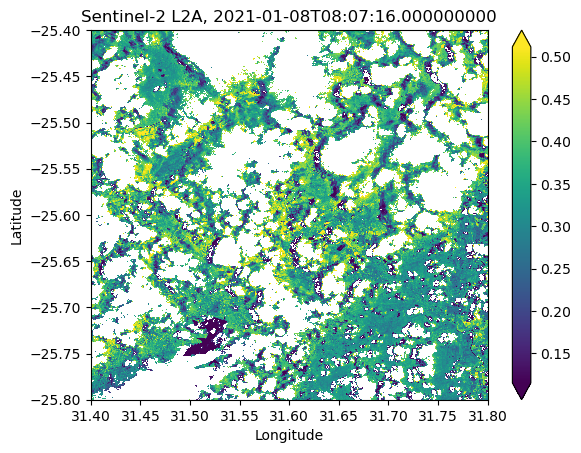

In [5]:
scene_B08 = ds_subset.B08.isel(time=10)

scene_B08.plot(robust=True, add_labels=False)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title(f"Sentinel-2 L2A, {scene_B08.time.data}")

Notice, that you can see some areas that are not perfectly masked (e.g., cloud shadows). 
Depending on your analysis, further cleaning steps of the data might be necessary.

Masked areas are [`numpy.nan`](https://numpy.org/doc/stable/reference/constants.html#numpy.nan) 
values in the data array, which we can plot by selecting them using Xarray's [`isnull`-method](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.isnull.html#xarray.Dataset.isnull):

Text(0.5, 1.0, 'Sentinel-2 L2A masked pixels, 2021-01-08T08:07:16.000000000')

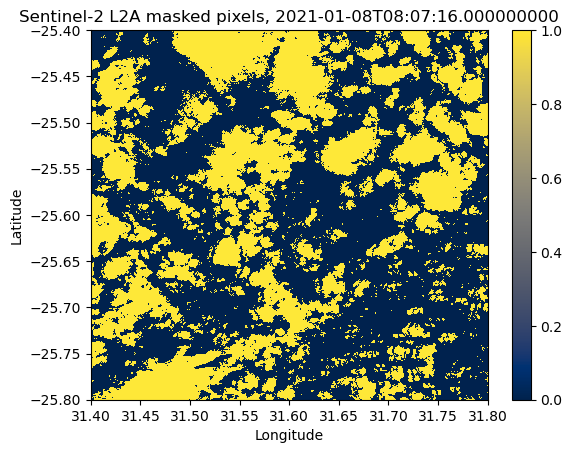

In [12]:
scene_B08.isnull().plot(add_labels=False, cmap="cividis")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title(f"Sentinel-2 L2A masked pixels, {scene_B08.time.data}")

## Group acquisition slices

One issue with the Sentinel-2 L2A product is that the data is split into multiple 
acquisition slices due to the overlapping grid used (which unfortunately is not
the most efficient, see [here](https://doi.org/10.1016/j.isprsjprs.2023.07.015)). 

You can view the entire grid over continental Africa in the Digital Earth Africa 
[Explorer](https://explorer.digitalearth.africa/products/s2_l2a).

The following example shows an acquisition that has been sliced into four parts:

In [13]:
date = "2021-01-08"
ds.sel(time=date).time

<xarray.DataArray 'time' (time: 4)>
array(['2021-01-08T08:07:02.000000000', '2021-01-08T08:07:05.000000000',
       '2021-01-08T08:07:16.000000000', '2021-01-08T08:07:19.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2021-01-08T08:07:02 ... 2021-01-08T08:...

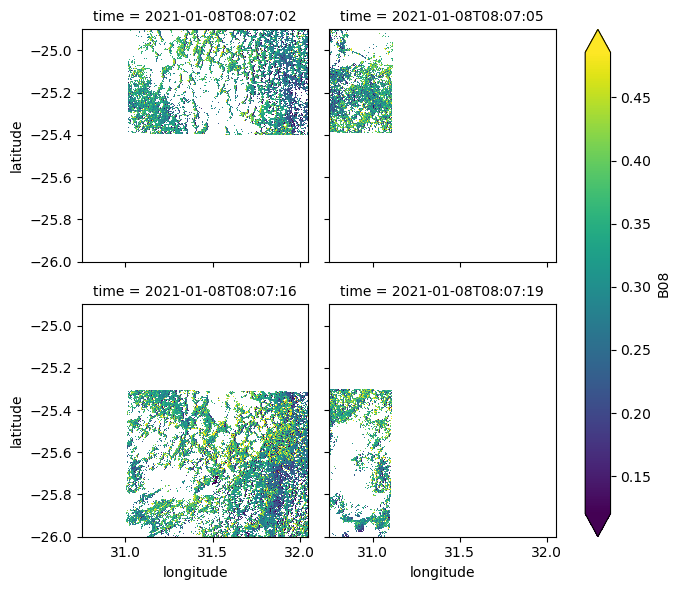

In [8]:
ds.sel(time=date).B08.plot(robust=True, 
                           add_labels=False, 
                           x="longitude", 
                           y="latitude", 
                           col="time", 
                           col_wrap=2)

To mitigate this issue, we can group these slices by using the 
`sdc.utils.groupby_acq_slices`-function. It returns an `xarray.DataSet` object with
the same dimensions as the input data, but with groups of acquisition slices aggregated
by calculating the mean of each group. 

Notice that the number of time steps has decreased from 438 in the original data to 146.

In [9]:
from sdc.utils import groupby_acq_slices

ds_grouped = groupby_acq_slices(ds)
ds_grouped.B08

<xarray.DataArray 'B08' (time: 146, latitude: 5500, longitude: 6500)>
dask.array<transpose, shape=(146, 5500, 6500), dtype=float32, chunksize=(146, 254, 300), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 30.75 30.75 30.75 ... 32.05 32.05 32.05
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2021-01-01T08:00:00 ... 2021-12-29T08:...

In [10]:
ds_grouped.sel(time=date).time

<xarray.DataArray 'time' (time: 1)>
array(['2021-01-08T08:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2021-01-08T08:00:00

Plotting this data shows that the acquisition slices have been grouped correctly:

Text(0.5, 1.0, "Sentinel-2 L2A, ['2021-01-08T08:00:00.000000000']")

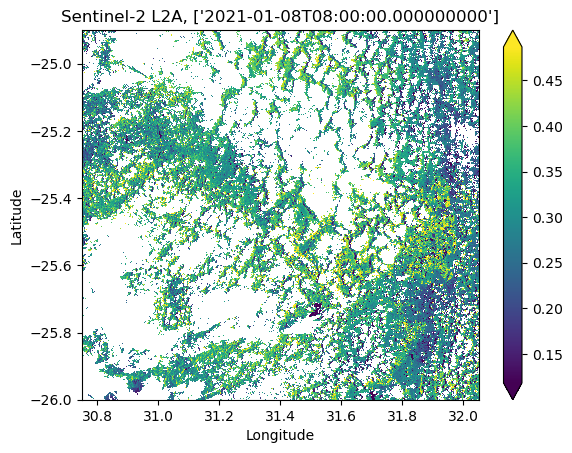

In [14]:
ds_grouped.B08.sel(time=date).plot(robust=True, add_labels=False)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title(f"Sentinel-2 L2A, {ds_grouped.B08.sel(time=date).time.data}")

## General: Count valid pixels

```{note}
Sections with the "General"-prefix are not specific to the Sentinel-2 L2A product, but 
can be applied to other products as well.
```

In some cases it can be useful to count the number of valid pixels in a dataset and 
visualize the result. The resulting array could also be used as a layer in further 
analysis.

The following is an example on how to achieve this using a combination of NumPy's 
[`isfinite`-method](https://numpy.org/doc/stable/reference/generated/numpy.isfinite.html) 
and Xarray's [`sum`-method](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.sum.html):

In [18]:
valid_px_count = np.isfinite(ds.B08).sum(dim="time")
valid_px_count

<xarray.DataArray 'B08' (latitude: 5500, longitude: 6500)>
dask.array<sum-aggregate, shape=(5500, 6500), dtype=int64, chunksize=(254, 300), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 30.75 30.75 30.75 ... 32.05 32.05 32.05
    spatial_ref  int32 4326

Text(0.5, 1.0, 'Valid pixel count, Sentinel-2 L2A (2021-01-01 to 2022-01-01)')

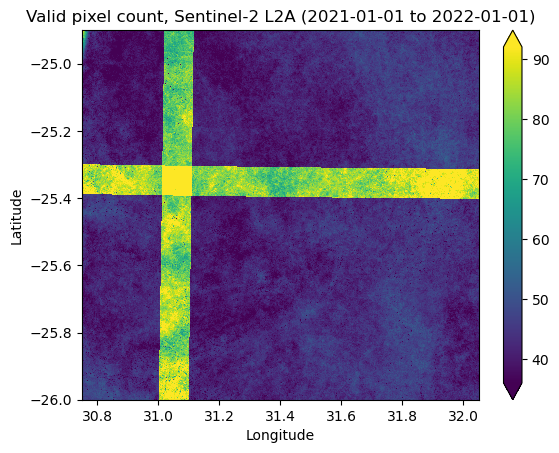

In [19]:
valid_px_count.plot(robust=True, add_labels=False)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Valid pixel count, Sentinel-2 L2A (2021-01-01 to 2022-01-01)")

Interesting pattern we can observe here... I'll let you guess why this is the case 😉

Let's do this again with the data that we have grouped by acquisition slices in order 
to not count the same pixels multiple times:

Text(0.5, 1.0, 'Valid pixel count, Sentinel-2 L2A (2021-01-01 to 2022-01-01)')

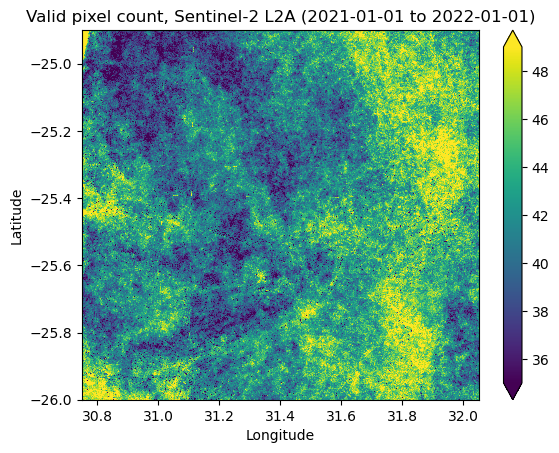

In [20]:
valid_px_count_grouped = np.isfinite(ds_grouped.B08).sum(dim="time")
valid_px_count_grouped.plot(robust=True, add_labels=False)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Valid pixel count, Sentinel-2 L2A (2021-01-01 to 2022-01-01)")